We will use Naive Bayes to model the "Pima Indians Diabetes" data set. This model will predict which people are likely to develop diabetes.


This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Import Libraries

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

## Load and review data

In [10]:
pdata = pd.read_excel(r"C:\Users\svika\Documents\DSBA-June2022\Ml\653977-pima-indians-diabetes+(1).xlsx")

In [11]:
pdata.shape # Check number of columns and rows in data frame

(768, 9)

In [12]:
pdata.head() # To check first 5 rows of data set

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
pdata['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

In [7]:
pdata.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
pdata.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

## Identify Correlation in data 

In [ ]:
normal distribution
independent variables should not be having linear realtionship

In [15]:
pdata

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:>

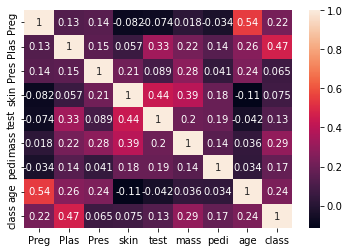

In [14]:
sns.heatmap(pdata.corr(), annot=True) # It will show correlation matrix 

In [25]:
# However we want to see correlation in graphical representation so below is function for that
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

In above plot yellow colour represents maximum correlation and blue colour represents minimum correlation.
We can see none of variable have correlation with any other variables.

In [15]:
# sns.pairplot(pdata,diag_kind='kde')

## Calculate diabetes ratio of True/False from outcome variable 

In [28]:
n_true = len(pdata.loc[pdata['class'] == True])
n_false = len(pdata.loc[pdata['class'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 268 (34.90%)
Number of false cases: 500 (65.10%)


So we have 34.90% people in current data set who have diabetes and rest of 65.10% doesn't have diabetes. 

Its a good distribution True/False cases of diabetes in data.

## Spliting the data 
We will use 70% of data for training and 30% for testing.

In [16]:
from sklearn.model_selection import train_test_split

X = pdata.drop(['class'],axis=1)     # Predictor feature columns (8 X m)
Y = pdata['class']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=12)
# 1 is just any random seed number

x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
360,5,189,64,33,325,31.2,0.583,29
655,2,155,52,27,540,38.7,0.240,25
323,13,152,90,33,29,26.8,0.731,43
205,5,111,72,28,0,23.9,0.407,27
111,8,155,62,26,495,34.0,0.543,46


In [86]:
pdata.shape

(768, 9)

In [87]:
x_train.shape

(537, 8)

In [61]:
y_train.shape

(537,)

In [62]:
x_test.shape

(231, 7)

In [63]:
y_test.shape

(231,)

In [64]:
y_train.value_counts()

0    353
1    184
Name: class, dtype: int64

In [28]:
y_test.value_counts()

0    147
1     84
Name: class, dtype: int64

Lets check split of data

In [35]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pdata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pdata.index)) * 100))

69.92% data is in training set
30.08% data is in test set


Now lets check diabetes True/False ratio in split data 

In [20]:
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['class'] == 1]), (len(pdata.loc[pdata['class'] == 1])/len(pdata.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(pdata.loc[pdata['class'] == 0]), (len(pdata.loc[pdata['class'] == 0])/len(pdata.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 268 (34.90%)
Original Diabetes False Values   : 500 (65.10%)

Training Diabetes True Values    : 184 (34.26%)
Training Diabetes False Values   : 353 (65.74%)

Test Diabetes True Values        : 84 (36.36%)
Test Diabetes False Values       : 147 (63.64%)



# Data Preparation

### Check hidden missing values 

As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [37]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


We can see lots of 0 entries above.

### Replace 0s with serial mean 

In [17]:
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#data_with_imputed_values = my_imputer.fit_transform(original_data)

# from sklearn.impute import SimpleImputer
# rep_0 = SimpleImputer(missing_values=0, strategy="mean")
# cols=x_train.columns
# x_train = pd.DataFrame(rep_0.fit_transform(x_train))
# x_test = pd.DataFrame(rep_0.fit_transform(x_test))

# x_train.columns = cols
# x_test.columns = cols

# x_train.head()

# Logistic Regression

In [4]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

In [5]:
model = LogisticRegression()

In [19]:
# Fit the model on train
model = LogisticRegression()
model.fit(x_train, y_train)

C:\Users\svika\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [21]:



#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

# 15.000000	136.0	70.0	32.0	110.000000	37.1	0.153	43.0
# 1/1+e-(a+b1x1+b2x2+b3x3)

         0         1         2         3         4         5         6  \
0  0.09614  0.035941 -0.013578 -0.009047  0.000093  0.100596  1.525737   

          7  intercept  
0  0.020099   -9.17389  


In [22]:
model.score(x_train, y_train)

0.7839851024208566

In [23]:
model_score = model.score(x_test, y_test)
print(model_score)

0.7922077922077922


In [24]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

In [25]:
metrics.recall_score(y_test, y_predict, labels=[1, 0])

0.6071428571428571

In [26]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       147
           1       0.77      0.61      0.68        84

    accuracy                           0.79       231
   macro avg       0.79      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231



In [27]:
cm

array([[ 51,  33],
       [ 15, 132]], dtype=int64)

The confusion matrix

True Positives (TP): we correctly predicted that they do have diabetes 48

True Negatives (TN): we correctly predicted that they don't have diabetes 132

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error") 14 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") 37 Falsely predict negative Type II error

In [33]:
x_test.head(3)

,Preg,Plas,Pres,skin,test,mass,pedi,age
229,0,117,80,31,53,45.2,0.089,24
235,4,171,72,0,0,43.6,0.479,26
750,4,136,70,0,0,31.2,1.182,22


In [32]:
y_test.head(3)

229    0
235    1
750    1
Name: class, dtype: int64

In [30]:
message = pd.DataFrame({"Preg":[0],"Plas":[117],'Pres':[80],"skin":[31],"test":[53],"mass":[45.2],"pedi":[0.089],"age":[24]})

In [1]:
LogRegression.predict(message)[0]

NameError: name 'LogRegression' is not defined

In [10]:
import pickle

In [41]:
pwd

'C:\\Users\\svika\\Documents\\DSBA-June2022\\Ml'

In [38]:
pickle.dump(model, open('LogRegression_Version1.pkl', 'wb'))

In [42]:
data= {"Preg":[0],"Plas":[117],'Pres':[80],"skin":[31],"test":[53],"mass":[45.2],"pedi":[0.089],"age":[24]}
#         data = 

messages=pd.DataFrame(data, index=[0])

In [43]:
messages

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,0,117,80,31,53,45.2,0.089,24


In [7]:
import pandas as pd

In [5]:
def LogisticRegrssion_Predict():

    data= {"Preg":[0],"Plas":[117],'Pres':[80],"skin":[31],"test":[53],"mass":[45.2],"pedi":[0.089],"age":[24]}
    messages=pd.DataFrame(data, index=[0])
    pred =LogRegression.predict(messages)[0]
    
    return pred

In [12]:
LogisticRegrssion_Predict()

0

In [ ]:
Docker - Container

Empty Box:
    requirement file 
    pip install -r req.txt
    LogRegression.pkl
    pred.py
    DockerFile - python 3.6.8 - req.txt - load model - pred.py
    
  

In [1]:
import pickle
import pandas as pd
LogRegression = pickle.load(open("LogRegression.pkl", "rb"))

In [2]:
from flask import Flask, request, json, jsonify
app=Flask(__name__)

In [3]:
@app.route('/LogisticRegrssion', methods=['POST']) 
def LogisticRegrssion_Predict():
    if request.method == 'POST': 
        Preg=request.json['Preg']
        Plas=request.json['Plas']
        Pres=request.json['Pres']
        skin=request.json['skin']
        test=request.json['test']
        mass=request.json['mass']
        pedi=request.json['pedi']
        age=request.json['age']
        data= {"Preg":Preg,"Plas":Plas,'Pres':Pres,"skin":skin,"test":test,"mass":mass,"pedi":pedi,"age":age}
        messages=pd.DataFrame(data, index=[0])
        pred =LogRegression.predict(messages)[0]
    
    return jsonify(str(pred))

if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [07/Mar/2023 08:09:45] "POST /LogisticRegrssion HTTP/1.1" 200 -
[2023-03-07 08:11:17,017] ERROR in app: Exception on /LogisticRegrssion [POST]
Traceback (most recent call last):
  File "C:\Users\svika\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\svika\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\svika\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\svika\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\svika\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\svika\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_reque

In [ ]:
import requests
import json

url = "http://127.0.0.1:5000/LogisticRegrssion"

payload = json.dumps({
  "Preg": 0,
  "Plas": 117,
  "Pres": 80,
  "skin": 31,
  "test": 53,
  "mass": 45.2,
  "pedi": 0.089,
  "age": 24
})


response = requests.request("POST", url, data=payload)

print(response.text)

In [ ]:
EDA - outliers remove columns
Build 1st model - perf 79 acc, 60 recall (....)

Hyperparramter - GS, RS
Prediction Script using Flask
KFold Cross Validation



 